In [3]:
import cv2
from numpy import *
import numpy as np
from matplotlib import pyplot as plt
import os
import glob

In [4]:
import tensorflow as tf

In [5]:
spec0 =glob.glob("/content/drive/MyDrive/spectrograms/0/*.*")
spec1 =glob.glob("/content/drive/MyDrive/spectrograms/1/*.*")
spec2 =glob.glob("/content/drive/MyDrive/spectrograms/2/*.*")
spec3 =glob.glob("/content/drive/MyDrive/spectrograms/3/*.*")
spec4 =glob.glob("/content/drive/MyDrive/spectrograms/4/*.*")
spec5 =glob.glob("/content/drive/MyDrive/spectrograms/5/*.*")
spec6 =glob.glob("/content/drive/MyDrive/spectrograms/6/*.*")
spec7 =glob.glob("/content/drive/MyDrive/spectrograms/7/*.*")
spec8 =glob.glob("/content/drive/MyDrive/spectrograms/8/*.*")
spec9 =glob.glob("/content/drive/MyDrive/spectrograms/9/*.*")
spec_size = [spec0,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9]

In [6]:
def on_isleme(liste):
  spec=[]
  for i in range(len(liste)):
    for j in range(len(liste[i])):
      img = cv2.imread(liste[i][j],0)
      dim = (374, 374)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      img = cv2.normalize(img, None, alpha=0,beta=255, norm_type=cv2.NORM_MINMAX)
      etiketler=liste[i][j].split("-")
      etiket=etiketler[1]
      gecici = [img,etiket]
      spec.append(gecici)
  return spec


In [7]:
def etiket_al(liste):
  etiket=[]
  for i in range(len(liste)):
    etiket.append(liste[i][1])
  return etiket


In [8]:
def goruntu_al(liste):
  goruntu=[]
  for i in range(len(liste)):
    goruntu.append(liste[i][0])
  return goruntu

In [9]:
spec = on_isleme(spec_size)

In [10]:
eticets = etiket_al(spec)
imgs = goruntu_al(spec)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X, y = imgs , eticets

In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.5)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
print(len(X_train))
print(len(X_test))
print(len(X_valid))

3492
1747
3493


In [23]:
model = tf.keras.Sequential()
input_layer = tf.keras.layers.Dense(3000, input_shape=(374,374), activation='relu')
model.add(input_layer)
model.add(tf.keras.layers.Dense(3000,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(3000,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(3000,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(3000,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
results=model.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid))

Epoch 1/10
110/110 [==============================] - 101s 910ms/step - loss: 152.3290 - accuracy: 0.1234 - val_loss: 2.2955 - val_accuracy: 0.1068
Epoch 2/10
110/110 [==============================] - 98s 894ms/step - loss: 2.4717 - accuracy: 0.1234 - val_loss: 2.2878 - val_accuracy: 0.1068
Epoch 3/10
110/110 [==============================] - 98s 890ms/step - loss: 2.2840 - accuracy: 0.1220 - val_loss: 2.2814 - val_accuracy: 0.1068
Epoch 4/10
110/110 [==============================] - 98s 890ms/step - loss: 2.2781 - accuracy: 0.1220 - val_loss: 2.2766 - val_accuracy: 0.1068
Epoch 5/10
110/110 [==============================] - 98s 889ms/step - loss: 2.2738 - accuracy: 0.1220 - val_loss: 2.2726 - val_accuracy: 0.1068
Epoch 6/10
110/110 [==============================] - 98s 890ms/step - loss: 2.2706 - accuracy: 0.1220 - val_loss: 2.2698 - val_accuracy: 0.1068
Epoch 7/10
110/110 [==============================] - 98s 891ms/step - loss: 3.1736 - accuracy: 0.1217 - val_loss: 2.2678 - val

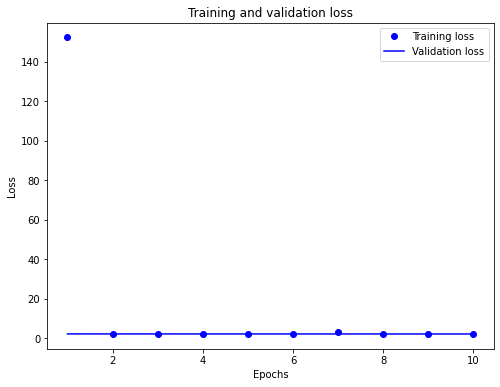

In [28]:
history_dict = results.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

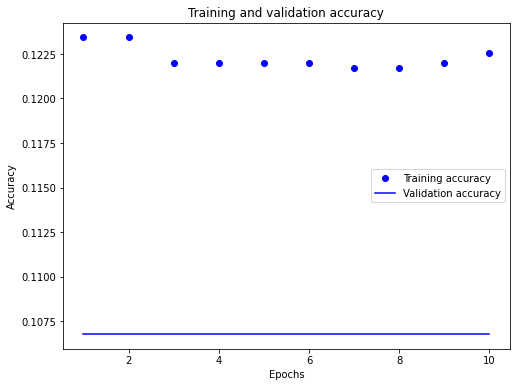

In [26]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()